In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
np.random.seed(1)

file_csv = 'data.csv' # Cargo el archivo con los datos X1,X2 y Salida.

data = pd.read_csv(file_csv) # Guardo datos del archivo en una variable 

print("Tamaño archivo:",data.shape, "\n", "-------------------------", "\n", data)

# Lleno los datos X_test(x1,x2) y Y_test 
data = np.array(data)
#print(data)
X_test=[]
y_test=[]
for i in range(10):
    X_test.append([data[i,0],data[i,1]])
    y_test.append(data[i,2])

X_test = np.array(X_test) # Puntos de entrada 
y_test = np.array(y_test) # valor de clasificación 

W_test = np.array([[-0.88039143], [-0.53725237]])
b_test = 0.7299939418114051
print("Pesos y Bias iniciales:", W_test,b_test)

Tamaño archivo: (100, 3) 
 ------------------------- 
           X         W  b
0   0.78051 -0.063669  1
1   0.28774  0.291390  1
2   0.40714  0.178780  1
3   0.29230  0.421700  1
4   0.50922  0.352560  1
..      ...       ... ..
95  0.77029  0.701400  0
96  0.73156  0.717820  0
97  0.44556  0.579910  0
98  0.85275  0.859870  0
99  0.51912  0.623590  0

[100 rows x 3 columns]
Pesos y Bias iniciales: [[-0.88039143]
 [-0.53725237]] 0.7299939418114051


In [81]:
""" FUNCIONES """
# -------------------------------------- Cross entropy
def cross_entropy(T,P):
    out = []
    for k in range(len(T)):
        if T[k] == 1:
            out.append(np.log(P[k]))
        else:
            out.append(np.log(1-P[k]))
    out = np.array(out) 
    cross = -1*np.sum(out)
    return cross
            
# -------------------------------------- Score
def score(X,W,b):
    return np.matmul(X,W)+b
# -------------------------------------- Softmax
def softmax(z):
    return (np.exp(z))/np.sum(np.exp(z))
# -------------------------------------- Sigmoid
def sigmode(z):
    return 1/(1+np.exp(-z))
# --------------------------------------

# Se calcula el score de los datos
output = [] # array para llenar la salida del score
output = score(
    X_test,
    W_test,
    b_test,
)

output = np.array(output) # Salida del score 
# Imprimo el minimo y el maximo del score y el tamaño del array de los datos
print(min(output),max(output), len(output))
# Salida del score de los datos
print(output)

[0.07704595] [0.42734318] 10
[[0.07704595]
 [0.32012014]
 [0.2755014 ]
 [0.2460962 ]
 [0.09226732]
 [0.42734318]
 [0.30915724]
 [0.17476601]
 [0.20362843]
 [0.38932188]]


In [82]:
""" SE CALCULAN LAS PROBABILIDADES CON SIGMODE Y SOFTMAX """
pro,pro1 = [], []

pro = softmax(output) # Probabilidad  softmax
pro1 = sigmode(output) # Probabilidad sigmode


Text(0.5, 1.0, 'Probabilidad softmax')

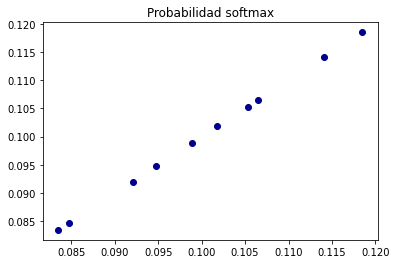

In [83]:
""" GRAFICA PROBABILIDADES CON SOFTMAX"""
# print(pro.shape)
# print(pro)

plt.figure()
plt.scatter(pro, pro, color="darkblue")
plt.title("Probabilidad softmax")

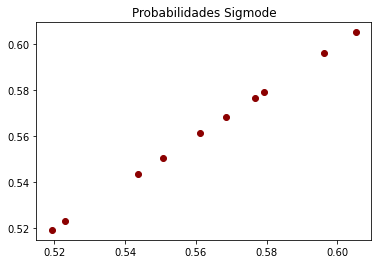

In [84]:
""" GRAFICA PROBABILIDADES SIGMODE """
# print(min(pro1),max(pro1),pro1.shape)
# print(pro1)    
plt.scatter(pro1, pro1, color='darkred', marker='o')
plt.title("Probabilidades Sigmode")
plt.show()

In [85]:
Y = np.array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0]) # sE CREA UN ARRAY PARA ASIMILAR LABEL
# print(Y.shape,len(Y))
# print(Y[0],Y[4])

A , B = [],[] # vectores para llenar cross entropy

# Pruebas cross_entropy algoritmos manuales
# --------- con softmax
for k in range(len(Y)):
    if Y[k] == 1:
        A.append(np.log(pro[k]))
    else:
        A.append(np.log(1-pro[k]))
A = np.array(A)
c_ent = -1*np.sum(A)

# -------  con sigmode
for k in range(len(Y)):
    if Y[k] == 1:
        B.append(np.log(pro1[k]))
    else:
        B.append(np.log(1-pro1[k]))
B = np.array(B)
c1_ent = -1*np.sum(B)
# ------------------------------------- Prueba cross entropy con la funcion creada
""" FUNCION CROSS_ENTROPY LLAMADO"""
entropia, entropia1 =[],[]
label = Y
entropia = cross_entropy(
    label,
    pro,
)
entropia1 = cross_entropy(
    label,
    pro1,
)

print("Cross entropy con softmax",c_ent)
print("Cross entropy con sigmode",c1_ent)
print("Cross entropy funcion" + "\n" + "Softmax = {}\nSigmode = {} ".format(entropia, entropia1))

Cross entropy con softmax 10.156983094416558
Cross entropy con sigmode 7.536873899360025
Cross entropy funcion
Softmax = 10.156983094416558
Sigmode = 7.536873899360025 
